In [3]:
import pandas as pd
import numpy as np

In [14]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
cat_col=df.select_dtypes('O').columns
for c in cat_col:
    print(c,'---',df[c].unique())

Car_Name --- ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220'

In [16]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [18]:
final_dataset['no_years']=2020-final_dataset['Year']

In [19]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [20]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [21]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [22]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [24]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

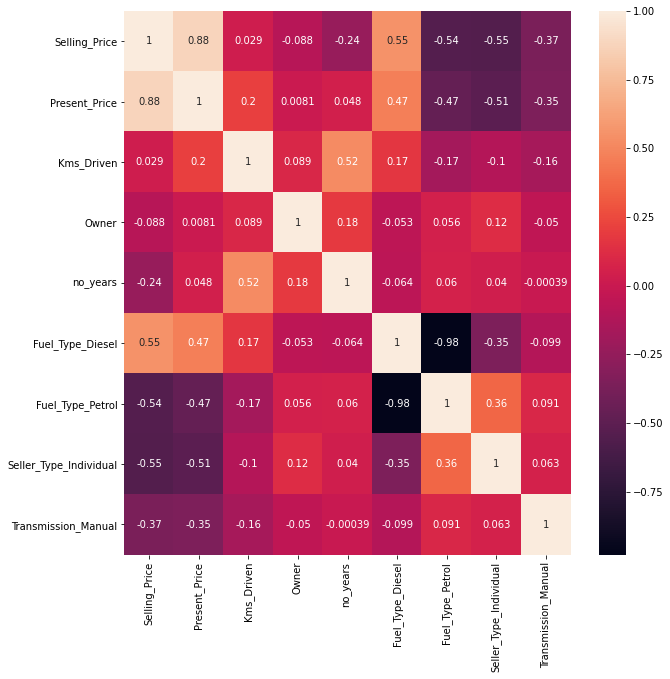

In [33]:
plt.figure(figsize=(10,10))
a=sns.heatmap(final_dataset.corr(),annot=True)

In [34]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [35]:
X=final_dataset.iloc[:,1:]

In [36]:
y=final_dataset.iloc[:,0]

In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [46]:
### Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [47]:
print(model.feature_importances_)

[0.33351417 0.0378728  0.00099298 0.0758022  0.24559833 0.01138793
 0.13748715 0.15734444]


In [48]:
X.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


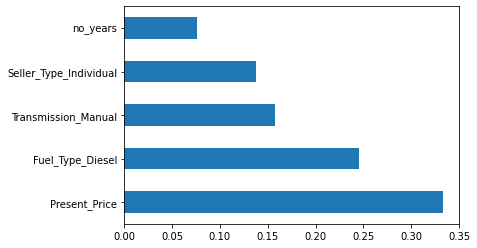

In [51]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [145]:
#HyperParameter Tunning
#Number of tress in random Forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#max_depth
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#number of features
max_features=['auto','sqrt']
#min sample split
min_sample_split=[2,5,10,15,100]
#min sample leaf
min_sample_leaf=[1,2,5,10]

In [146]:
from sklearn.model_selection import RandomizedSearchCV


In [147]:
random_grid={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'max_features':max_features,
            'min_samples_split':min_sample_split,
            'min_samples_leaf':min_sample_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [148]:
rf=RandomForestRegressor()

In [149]:
rf_Random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=84,n_jobs=1)

In [150]:
rf_Random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   2.5s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   2.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=25, total=   2.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=600, min_samples_split=5, m

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=84, scoring='neg_mean_squared_error',
                   verbose=2)

In [151]:
rf_Random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [152]:
predictions=rf_Random.predict(X_test)

In [153]:
predictions

array([ 0.57376969,  1.06362761,  5.29289864,  0.50792986,  3.36404523,
        0.46029691, 10.29262789,  0.27321162,  0.54856557,  9.22420684,
        7.89492088,  1.79411509,  5.54022285,  2.58616453,  0.23965102,
       11.48890635,  5.15500912,  2.96820119,  6.14150634,  5.81479941,
        6.25337272,  0.65572843,  0.46760042,  2.54934996,  5.85984949,
       21.88183654,  5.79633963,  1.05368892, 18.44055159,  4.16548119,
        0.61239812,  4.78553107,  6.85433848,  1.12461099,  3.0155088 ,
        3.24850828,  0.45167746, 18.25762718,  0.4502394 ,  0.79016548,
        0.252696  ,  9.22420684,  0.65101803,  6.43910068,  7.82864657,
        3.12770638,  3.52830456,  5.43584646, 10.16506472,  8.16544826,
        2.23233599,  0.48840217,  4.29052297,  7.41390382,  4.07416496,
        4.91880298,  5.60936904,  4.36306769,  9.72288293,  4.12635642,
        4.62510099])

<AxesSubplot:xlabel='Selling_Price'>

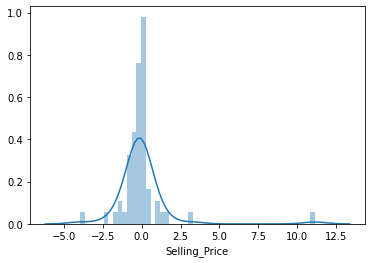

In [154]:
sns.distplot(y_test-predictions)

<AxesSubplot:xlabel='Selling_Price'>

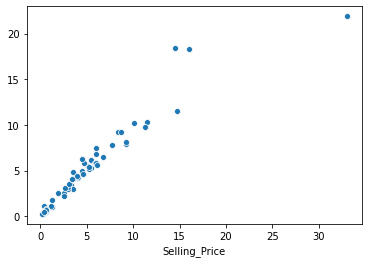

In [155]:
sns.scatterplot(y_test,predictions)

In [156]:
from sklearn import metrics

In [157]:
metrics.r2_score(y_test,predictions)

0.8967181472862533

In [161]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_Random,file)